In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid") 

In [2]:
data = pd.read_csv('Adobe1.csv')

In [3]:
data.head()

,Page,Unique Visitors,Page Views,Visits,Pages per Visit,ATS,Bounce Rate,Entry Rate,Exit Rate,Searches
0,https://us.spdrs.com/en/ad/mdy?WT.mc_id=digita...,52923,57480,54230,1.1,0:00:09,0.9226,0.9998,0.99,0
1,https://us.spdrs.com/en/ad/mdy?WT.mc_id=dis_MD...,22341,27756,25077,1.1,0:00:22,0.8944,0.9981,0.98,2
2,https://us.spdrs.com/en,17165,24844,20211,1.2,0:00:53,0.5085,0.8103,0.53,8510
3,https://us.spdrs.com/en/ad/mdy?WT.mc_id=digita...,12331,14274,13503,1.1,0:00:14,0.9338,0.9985,0.99,0
4,https://us.spdrs.com/en/etf/spdr-sp-500-etf-SPY,7143,9784,8979,1.1,0:01:10,0.6647,0.7105,0.81,5277


In [4]:
data.ATS = [int(i[2:4])*60 + int(i[5:]) for i in data.ATS]

In [5]:
data.ATS.head()

0     9
1    22
2    53
3    14
4    70
Name: ATS, dtype: int64

In [6]:
data = data.drop(['Page'],axis=1)
data_norm = (data - data.min()) / (data.max() - data.min())

In [7]:
#?clf
clf = KMeans(n_clusters=6)

In [8]:
clf.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
print(clf.cluster_centers_)

[[0.08553666 0.09335162 0.09172024 0.13636364 0.13032985 0.88222513
  0.99275855 0.95658073 0.02670655]
 [0.00663582 0.00985909 0.00990668 0.1969697  0.46580853 0.66070033
  0.85272292 0.78697422 0.10144215]
 [1.         1.         1.         0.16666667 0.07964602 0.90212443
  0.99971803 0.98507463 0.        ]
 [0.03098919 0.05970534 0.03761083 0.70833333 0.7300885  0.39532752
  0.27128859 0.32462687 0.10843126]
 [0.11399163 0.15103824 0.12911545 0.41666667 0.46902655 0.29824229
  0.83353306 0.27238806 0.49864865]
 [0.01723174 0.02234367 0.02256729 0.1754386  0.74289707 0.55076804
  0.5217301  0.61429694 0.1679572 ]]


In [10]:
print(clf.labels_)

[2 0 4 0 5 0 4 0 0 3 3 0 4 5 1 5 5 5 5 4 5 1 5 0 1 5 5 0 5 5 5 5 0 1 3 1 5
 3 0 1 5 0 5 1 1 1 5 1 1 5]


In [11]:
print(clf.inertia_)

4.152691205102262


In [12]:
print(clf.predict(data_norm))

[2 0 4 0 5 0 4 0 0 3 3 0 4 5 1 5 5 5 5 4 5 1 5 0 1 5 5 0 5 5 5 5 0 1 3 1 5
 3 0 1 5 0 5 1 1 1 5 1 1 5]


1 18.594470861459232
2 11.22048855809204
3 8.590417374619127
4 6.489318550288382
5 5.20704075598768
6 4.152691205102262
7 3.5670804970292393
8 3.0193280704279517
9 2.5683553760974673
10 2.052331323982934
11 1.7770431338409676
12 1.5642148982880344
13 1.4430018648466985
14 1.2775147269299145


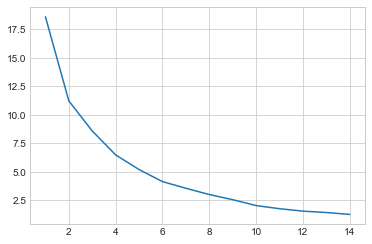

In [13]:
k = range(1,15)
inerti = []
for i in range(1,15):
    clf = KMeans(n_clusters=i)
    #print(i)
    clf.fit(data_norm)
    inerti.append(clf.inertia_)
    print(i,clf.inertia_)
plt.plot(k,inerti)

In [14]:
'''
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
#from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('Adobe1.csv')
data.head()
data.ATS = [int(i[2:4])*60 + int(i[5:]) for i in data.ATS]
train = data.drop(['Page'],axis=1)
clf = KMeans(n_clusters=4)
#?clf
clf.fit(train)
print(clf.cluster_centers_)
print(clf.labels_)
print(clf.inertia_)
print(clf.predict(train))
'''

"\nimport numpy as np\nimport pandas as pd\nfrom sklearn.cluster import KMeans\n#from sklearn.preprocessing import MinMaxScaler\n\ndata = pd.read_csv('Adobe1.csv')\ndata.head()\ndata.ATS = [int(i[2:4])*60 + int(i[5:]) for i in data.ATS]\ntrain = data.drop(['Page'],axis=1)\nclf = KMeans(n_clusters=4)\n#?clf\nclf.fit(train)\nprint(clf.cluster_centers_)\nprint(clf.labels_)\nprint(clf.inertia_)\nprint(clf.predict(train))\n"

[5.42319247e-01 1.96805495e-01 9.88580829e-02 8.10118536e-02
 4.43601290e-02 3.01927012e-02 6.28334945e-03 1.54105866e-04
 1.50356036e-05]
[2.05798764e-01 7.46835519e-02 3.75145662e-02 3.07422969e-02
 1.68337373e-02 1.14574960e-02 2.38439915e-03 5.84799394e-05
 5.70569576e-06]


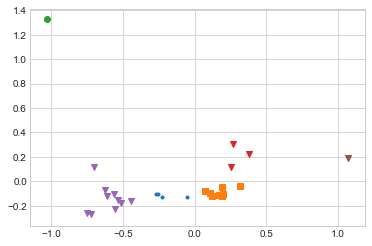

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(data_norm)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
data_norm_pca = pca.transform(data_norm)
#plt.scatter(data_norm_pca[:,0],data_norm_pca[:,1])
a = np.vstack((data_norm_pca[:,0],data_norm_pca[:,1],clf.labels_))
b = pd.DataFrame(a).T
b.columns = ['pca1','pca2','label']
#fig, ax = plt.subplots()
#ax.scatter(b.pca1,b.pca2)
b0 = b.loc[b.label == 0,]
b1 = b.loc[b.label == 1,]
b2 = b.loc[b.label == 2,]
b3 = b.loc[b.label == 3,]
b4 = b.loc[b.label == 4,]
b5 = b.loc[b.label == 5,]
fig = plt.figure()  
ax1 = fig.add_subplot(111)
ax1.scatter(b1.pca1,b1.pca2,marker='.')
ax1.scatter(b0.pca1,b0.pca2,marker=',')
ax1.scatter(b2.pca1,b2.pca2,marker='o')
ax1.scatter(b3.pca1,b3.pca2,marker='v')
ax1.scatter(b4.pca1,b4.pca2,marker='v')
ax1.scatter(b5.pca1,b5.pca2,marker='v')